In [2]:
from mnist import MNIST
import matplotlib.pyplot as plt
import numpy as np
import random


file_dir = "C:\\Users\\Yet Young\\Desktop\\documents\\ML\\MNIST_data"
mndata = MNIST(file_dir)

images, labels = mndata.load_training()
images = np.array(images)
labels = np.array(labels)

test_sizes = 10000
test_images = images[-test_sizes:]
test_labels = labels[-test_sizes:]

train_sizes = len(images) - test_sizes
train_images = images[:train_sizes]
train_labels = labels[:train_sizes]

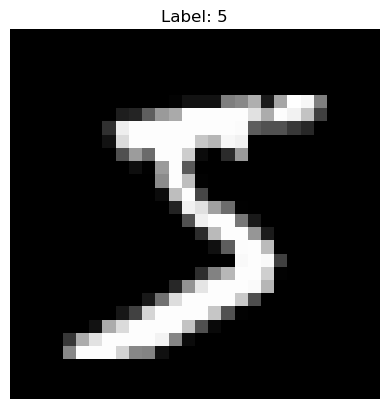

In [3]:
re_image = images.reshape((60000,28, 28))  
# print images
plt.imshow(re_image[0], cmap='gray')
plt.title(f'Label: {labels[0]}')
plt.axis('off')
plt.show()

In [4]:
#turning into one hot coding
total_labels = 10
one_hot_labels = np.zeros((len(images), total_labels))
for image in range(len(images)):
    for label in range(total_labels):
        if labels[image] == label:
            one_hot_labels[image][label] = 1
        else:
            one_hot_labels[image][label] = 0

one_hot_labels_train = one_hot_labels[:train_sizes]
one_hot_labels_test = one_hot_labels[train_sizes:]

In [5]:
class BP_Network():
    def __init__(self, sizes):
        self.sizes = sizes
        self.parameters = self.initalize()
        self.cache={
        "X" : np.zeros((self.sizes[4], self.sizes[0])),
        "z1" : np.zeros((self.sizes[4], self.sizes[1])),
        "a1" : np.zeros((self.sizes[4], self.sizes[1])), 
        "z2" : np.zeros((self.sizes[4], self.sizes[2])),
        "a2" : np.zeros((self.sizes[4], self.sizes[2])),
        "W3" : np.zeros((self.sizes[4], self.sizes[3])),
        "b3" : np.zeros((self.sizes[4], self.sizes[3])),
        }
        self.loss_history = []
    
    def initalize(self):
        input_layers = self.sizes[0]
        hidden_layer_1 = self.sizes[1]
        hidden_layer_2 = self.sizes[2]
        output_layers = self.sizes[3]
        data_size = self.sizes[4]
        
        np.random.seed(40)
        parameters = {
        "W1": np.random.randn(input_layers,hidden_layer_1)* 0.01,
        "b1": np.zeros((1, hidden_layer_1)),
        "W2": np.random.randn(hidden_layer_1,hidden_layer_2)* 0.01,
        "b2": np.zeros((1, hidden_layer_2)),
        "W3": np.random.randn(hidden_layer_2,output_layers)* 0.01,
        "b3": np.zeros((1, output_layers)),       
        }
        return parameters
    
    def relu(self, x):
        return np.maximum(0, x)    
    
    def Forward(self,x):
        self.cache['X'] = x
        
        self.cache['z1'] = self.cache['X'].dot(self.parameters['W1'])+self.parameters['b1']
        self.cache['a1'] = self.relu(self.cache['z1'])
        
        self.cache['z2'] = self.cache['a1'].dot(self.parameters['W2'])+self.parameters['b2']
        self.cache['a2'] = self.relu(self.cache['z2'])
        
        self.cache['z3'] = self.cache['a2'].dot(self.parameters['W3'])+self.parameters['b3']
        self.cache['a3'] = self.softmax(self.cache['z3'])  
        
        return self.cache['a3']


    def softmax(self, x):
        max_values = np.max(x, axis=1, keepdims=True)
        exps = np.exp(x - max_values)
        sum_exps = np.sum(exps, axis=1, keepdims=True)
        return exps / sum_exps
    
    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)


    def backpropagation(self, output, one_hot_labels, sizes,reg_lambda = 0.05, epsilon = 0.001):
        delta3 = (output - one_hot_labels)/sizes
        dW3 = np.dot((self.cache['a2'].T),delta3)
        db3 = np.sum(delta3,axis=0)
        delta2 = delta3.dot(self.parameters['W3'].T)*self.relu_derivative(self.cache['z2'])
        dW2 = np.dot(self.cache['a1'].T,delta2)
        db2 = np.sum(delta2,axis=0)    
        delta1 = delta2.dot(self.parameters['W2'].T)*self.relu_derivative(self.cache['z1'])
        dW1 = np.dot(self.cache['X'].T,delta1)
        db1 = np.sum(delta1,axis=0)     
    
        dW3 += reg_lambda*self.parameters['W3']
        dW2 += reg_lambda*self.parameters['W2']
        dW1 += reg_lambda*self.parameters['W1']
        
        
        
        
        self.parameters['W1'] += -epsilon*dW1
        self.parameters['b1'] += -epsilon*db1
        self.parameters['W2'] += -epsilon*dW2
        self.parameters['b2'] += -epsilon*db2
        self.parameters['W3'] += -epsilon*dW3
        self.parameters['b3'] += -epsilon*db3
        

    
    def accuracy(self,one_hot_labels, output):
        return np.mean(np.argmax(one_hot_labels, axis=-1) == np.argmax(output, axis=-1))
    
    def calculate_loss(self, output, train_labels):
        loss = -np.mean(np.log(output[range(len(train_labels)), train_labels] + 1e-10))
        self.loss_history.append(loss)
        return loss
        

Epoch 1, Loss: 0.2298, Accuracy: 93.33%
Epoch 2, Loss: 0.1319, Accuracy: 96.17%
Epoch 3, Loss: 0.1040, Accuracy: 97.04%
Epoch 4, Loss: 0.0812, Accuracy: 97.68%
Epoch 5, Loss: 0.0650, Accuracy: 98.19%
Epoch 6, Loss: 0.0708, Accuracy: 97.96%
Epoch 7, Loss: 0.0563, Accuracy: 98.39%
Epoch 8, Loss: 0.0442, Accuracy: 98.82%
Epoch 9, Loss: 0.0439, Accuracy: 98.80%
Epoch 10, Loss: 0.0395, Accuracy: 98.97%
Epoch 11, Loss: 0.0320, Accuracy: 99.23%
Epoch 12, Loss: 0.0290, Accuracy: 99.40%
Epoch 13, Loss: 0.0283, Accuracy: 99.37%
Epoch 14, Loss: 0.0255, Accuracy: 99.43%
Epoch 15, Loss: 0.0262, Accuracy: 99.43%
Epoch 16, Loss: 0.0216, Accuracy: 99.58%
Epoch 17, Loss: 0.0206, Accuracy: 99.62%
Epoch 18, Loss: 0.0199, Accuracy: 99.63%
Epoch 19, Loss: 0.0175, Accuracy: 99.72%
Epoch 20, Loss: 0.0218, Accuracy: 99.56%


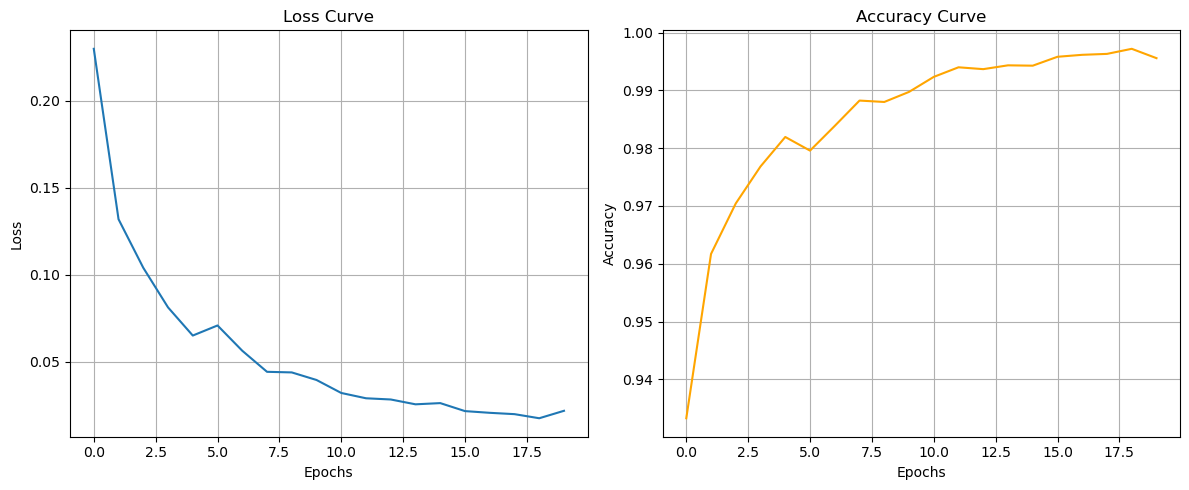

In [6]:
mnist_bp = BP_Network(sizes=[784, 128, 64, 10, train_sizes])
parameters = mnist_bp.initalize()
epochs = 20
batch_size = 100

accuracies = []
losses = []
for epoch in range(epochs):
    # shuffle the data
    indices = np.arange(len(train_images))
    np.random.shuffle(indices)
    shuffled_images = train_images[indices]
    shuffled_labels = one_hot_labels_train[indices]

    for start in range(0, len(train_images), batch_size):
        end = start + batch_size
        images_batch = shuffled_images[start:end]
        labels_batch = shuffled_labels[start:end]

        # Forward propagation on batch
        output = mnist_bp.Forward(images_batch)

        # Backpropagation on batch
        mnist_bp.backpropagation(output, labels_batch, batch_size, 0.02, 0.005)

    output = mnist_bp.Forward(train_images)
    accuracy = mnist_bp.accuracy(one_hot_labels_train, output)
    loss = mnist_bp.calculate_loss(output, train_labels)
    
    accuracies.append(accuracy)
    losses.append(loss)
    
    print(f'Epoch {epoch+1}, Loss: {loss:.4f}, Accuracy: {accuracy*100:.2f}%')


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), losses, label='Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracies, label='Accuracy', color='orange')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
#predict
output = mnist_bp.Forward(test_images)
accuracy = mnist_bp.accuracy(one_hot_labels_test, output)
print(f'Predict Accuracy: {accuracy*100:.2f}%')

Predict Accuracy: 97.83%
